In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
config = {
    "input_file": "data/raw_camera6-0400-0415.csv",
    "ground_truth_file": "data/true_camera6-0400-0415.csv",
    "input_position": "Local_Y",
    "input_speed": "v_Vel",
    "input_acc": "v_Acc"
}

In [112]:
df_input_data = pd.read_csv(config['input_file'])
df_ground_truth = pd.read_csv(config['ground_truth_file'])

In [113]:
df = df_input_data.merge(df_ground_truth, how = "inner", on = ["Vehicle_ID", "Frame_ID"], suffixes=["_input","_groud_truth"])
#df.loc[:, df.columns.str.contains("Ac")]
#df.loc[:, df.columns.str.contains("Local")].sample(10)
#df[(df.Local_Y_raw - df.Local_Y_new) > 30][["Local_Y_raw", "Local_Y_new"]]

In [114]:
df[config["input_speed"] + "_input"].describe() #get stats for speed and acc

count    196411.000000
mean         26.207206
std          12.904566
min           0.000000
25%          18.690000
50%          25.010000
75%          31.260000
max          95.300000
Name: v_Vel_input, dtype: float64

<AxesSubplot:>

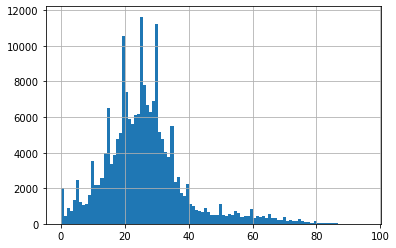

In [115]:
df[config["input_speed"] + "_input"].hist(bins=100)

In [116]:
df[config["input_acc"] + "_input"].describe() #get stats for speed and acc

count    196411.000000
mean         -0.092375
std           5.428405
min         -11.200000
25%          -1.030000
50%           0.000000
75%           0.930000
max          11.200000
Name: v_Acc_input, dtype: float64

<AxesSubplot:>

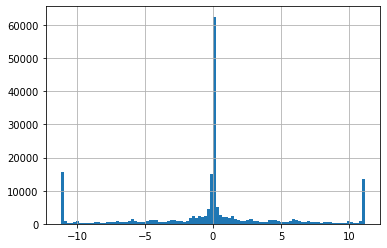

In [117]:
df[config["input_acc"] + "_input"].clip(-11.2, 11.2).hist(bins=100)

In [118]:
class Comparison():
    
    def __init__(self, input_data, true_data, cfg):
        self.config = cfg
        self.input_data = input_data
        self.true_data = true_data
        #raw - input, new - groud_truth
        self.df = self.input_data.merge(self.true_data, how = "inner", on = ["Vehicle_ID", "Frame_ID"], suffixes=["_input", "_groud_truth"])
        
    def MSE_speed(self):
        name = self.config['input_speed']
        self.df["Vel_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"]
        return np.sum(self.df["Vel_diff"] ** 2) / self.df.shape[0]
    
    def MSE_acce(self):
        name = self.config['input_acc']
        self.df["Acc_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"]
        return np.sum(self.df["Acc_diff"] ** 2)/self.df.shape[0]
    
    def MSE_loc(self):
        name = self.config['input_position']
        self.df["LocY_diff"] = self.df[name + "_input"] - self.df[name + "_groud_truth"]
        return np.sum(self.df["LocY_diff"] ** 2)/self.df.shape[0]
    
        

In [119]:
c = Comparison(df_input_data, df_ground_truth, config)

In [120]:
c.MSE_acce()

29.968966997236112

In [121]:
c.MSE_speed()

7.979435575881515

In [122]:
c.MSE_loc()

380.28473698268266

In [123]:
#np.sum((df["v_Vel_input"] - df["v_Vel_groud_truth"]) **2)/df.shape[0]
#np.sum((df["v_Acc_input"] - df["v_Acc_groud_truth"]) **2)/df.shape[0]
#df["v_Vel_input"] - df["v_Vel_groud_truth"]

In [124]:
df["Vel_diff"] = df["v_Vel_input"] - df["v_Vel_groud_truth"]
df.groupby("Lane_ID_groud_truth").mean()["Vel_diff"]

Lane_ID_groud_truth
1.0    1.696125
2.0    0.512742
3.0    0.596758
4.0    0.362744
5.0    0.368192
6.0    0.526293
9.0    0.454319
Name: Vel_diff, dtype: float64

In [125]:
# ax = sns.kdeplot(data = df, x = df["Vel_diff"], hue = "Lane_ID_groud_truth")
# ax.set_xlim((-6,6))

In [126]:
df[df["Lane_ID_groud_truth"] != df["Lane_ID_input"]][["Lane_ID_groud_truth", "Lane_ID_input"]]

,Lane_ID_groud_truth,Lane_ID_input
592,5.0,4.0
593,5.0,4.0
594,5.0,4.0
595,5.0,4.0
596,5.0,4.0
...,...,...
196311,4.0,3.0
196312,4.0,3.0
196313,4.0,3.0
196314,4.0,3.0
